In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Привет!  
Это файл для потготовки основной таблицы для отчета.

In [11]:
# constants
start_date = '2021-05-31 00:00:00'
end_date = '2021-06-06 23:59:59'
files_postfix = '310506062021'
export_file = f'plmtk{files_postfix}.csv'
bank_mnemonic = None

In [12]:
# prepare df
def clear_df(df):
    # clever dupples remove
    duples_mask = [True if df.loc[df['rtm_request_id_ebs']==each].shape[0] > 1 else False for each in df['rtm_request_id_ebs']]
    tm = df[duples_mask]
    print(f'Before cleaning: {df.shape[0]}')
    drop_index = tm.index[tm['smev_exit_code_description']=='\\N']
    df.drop(index=drop_index, inplace=True)
    df.drop_duplicates('rtm_request_id_ebs', keep='first', inplace=True)
    print(f'After cleaning: {df.shape[0]}')
    return df

df = pd.read_csv(export_file, sep=';')
df = df.loc[(df['info_system']!='UBS_DEV')&(df['info_system'].notna())&(df['info_system']!='OTIB')&(df['info_system']!='RTK027')]
# delete last row
df.drop(df.tail(1).index,inplace=True)
# add bank names
# print(df.shape[0], list(df))
# banks_dict = pd.read_excel('bank_names.xlsx', header=None)
# banks_dict[1] = banks_dict[1].astype(str)
# m_dict = banks_dict.set_index(1).to_dict()
# df['bank'] = [m_dict[0][system.strip(' ')] for system in df['info_system']]

# format dt
df['rtm_t'] = pd.to_datetime(df['rtm_t'], format='%d-%m-%Y %H:%M:%S')
#clear_df(df)

df.drop_duplicates('rtm_request_id_ebs', keep='first', inplace=True)

df = df.rename(columns={
    'rtm_t': 'init_date_time', 
    'rtm_request_id_ebs':'request_id', 
    'status': 'success', 
    'bkk_photo_code': 'bkk_photo_status_code', 
    'bkk_sound_code': 'bkk_sound_status_code'})

df = df.loc[(df['init_date_time'] > start_date)&(df['init_date_time'] < end_date)]
df['bkk_photo_status_code'] =  df['bkk_photo_status_code'].replace(['(Пустой)'], np.nan)
df['bkk_sound_status_code'] =  df['bkk_sound_status_code'].replace(['(Пустой)'], np.nan)

#save
df.to_csv(f'{files_postfix[:2]}.{files_postfix[2:4]}-{files_postfix[4:6]}.{files_postfix[6:8]}.csv')

In [37]:
df.loc[(df['info_system'] == '280201')&(df['t14_1'] > 0)]['t14_1'].describe()

count    51.000000
mean     10.588235
std      11.287474
min       2.000000
25%       5.500000
50%       7.000000
75%      12.000000
max      64.000000
Name: t14_1, dtype: float64

In [8]:
df.loc[df['info_system'] == '774002_3S'].loc[:, ['request_id', 'init_date_time', 'user_id','info_system','service_centre', 'smev_exit_code_description','success']].reset_index().to_excel('Raifaiseng_errors.xlsx')

In [59]:
df[df['info_system']=='900302']

,id,request_id,init_date_time,user_id,info_system,service_centre,bkk_photo_status_code,bkk_sound_status_code,smev_exit_code_description,success,...,n1_2_1,n1_2_2,n1_2_3,n2,n3,n6,n7,n8,n10,t15
16,-1327024748,3c812d6e-1ce1-11eb-ace2-024286d9aec9,2020-11-02 07:59:02,1.007828e+09,900302,1.046651e+09,NaN,NaN,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,-1818190016,5bf63f67-1ddb-11eb-ace2-024286d9aec9,2020-11-03 13:49:27,1.019375e+09,900302,1.046640e+09,NaN,107,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,-314660009,1aa305af-1ce2-11eb-ace2-024286d9aec9,2020-11-02 08:05:12,1.007828e+09,900302,1.046651e+09,NaN,NaN,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,-633491624,1c4538a4-1d11-11eb-ace2-024286d9aec9,2020-11-02 13:41:42,1.130018e+09,900302,1.046636e+09,NaN,NaN,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,-66591360,62e33529-1ddc-11eb-ace2-024286d9aec9,2020-11-03 13:56:48,1.019375e+09,900302,1.046640e+09,NaN,107,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,-720376792,6104aed0-1ce4-11eb-ace2-024286d9aec9,2020-11-02 08:21:33,1.007828e+09,900302,1.046651e+09,NaN,NaN,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,1204871063,a7c55955-1d11-11eb-ace2-024286d9aec9,2020-11-02 13:45:32,1.130018e+09,900302,1.046636e+09,NaN,NaN,Адаптация прошла успешно.,202.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,1251948891,d107504a-1ddc-11eb-ace2-024286d9aec9,2020-11-03 13:59:56,1.019375e+09,900302,1.046640e+09,NaN,107,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1781343793,e81dcf42-1d0d-11eb-ace2-024286d9aec9,2020-11-02 13:18:42,1.024469e+09,900302,1.046652e+09,NaN,NaN,Регистрация прошла успешно.,200.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,490323116,e612b168-1ddb-11eb-ace2-024286d9aec9,2020-11-03 13:53:17,1.019375e+09,900302,1.046640e+09,"1048576,2097152",107,Ошибка: EBS-02023. Биометрические образцы не п...,422.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
['bkk_photo_status_code_descr'].

# Не забывай очищать всякое говно тестовое.

In [74]:
dfz = df.copy()
dfz.set_index('init_date_time', inplace=True)
succeed = [200, 202, 200.0, 202.0]

banks_dict = pd.read_excel('bank_names.xlsx', header=None)
banks_dict[1] = banks_dict[1].astype(str)
m_dict = banks_dict.set_index(1).to_dict()
dfz['bank'] = [m_dict[0][system] for system in dfz['info_system']]

dfz['suc'] = [1 if status in succeed else 0 for status in dfz['success']]
dfz['unsuc'] = [1 if status not in succeed else 0 for status in dfz['success']]
mounthly_errors = dfz.resample('W-MON').agg({'suc':'sum', 'unsuc': 'sum', 'success': 'count'})
mounthly_errors['percent'] = ((mounthly_errors["suc"]/mounthly_errors["success"])*100)
#mounthly_errors['percent'] = mounthly_errors['percent'].map('{:,.2f}%'.format)
mounthly_errors['cange_rate'] = mounthly_errors['percent'].pct_change()
mounthly_errors.to_excel('w_change_all.xlsx')

In [72]:
a = dfz.groupby(['bank', pd.Grouper(freq='M')]).agg({'suc':'sum', 'unsuc': 'sum', 'success': 'count'})
a['percent'] = a["suc"]/a["success"]
a['cange_rate'] = a['percent'].pct_change()
a.to_excel('m_change_each_bank.xlsx')
a

suc  unsuc  \
bank                                               init_date_time               
 Публичное акционерное общество Инвестиционно-к... 2020-01-31        2      0   
                                                   2020-02-29        3      0   
                                                   2020-04-30        4      0   
                                                   2020-05-31        2      0   
                                                   2020-06-30        1      0   
...                                                                ...    ...   
ТКБ БАНК ПАО                                       2020-07-31        6      0   
                                                   2020-08-31        7      0   
                                                   2020-09-30        5      0   
ЭС-БИ-АЙ БАНК ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕ... 2020-01-31        1      0   
                                                   2020-02-29        1      0   

                                                                   success  \
bank                                               init_date_time            
 Публичное акционерное общество Инвестиционно-к... 2020-01-31            2   
                                                   2020-02-29            3   
                                                   2020-04-30            4   
                                                   2020-05-31            2   
                                                   2020-06-30            1   
...                                                                    ...   
ТКБ БАНК ПАО                                       2020-07-31            6   
                                                   2020-08-31            7   
                                                   2020-09-30            5   
ЭС-БИ-АЙ БАНК ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕ... 2020-01-31            1   
                                                   2020-02-29            1   

                                                                   percent  \
bank                                               init_date_time            
 Публичное акционерное общество Инвестиционно-к... 2020-01-31          1.0   
                                                   2020-02-29          1.0   
                                                   2020-04-30          1.0   
                                                   2020-05-31          1.0   
                                                   2020-06-30          1.0   
...                                                                    ...   
ТКБ БАНК ПАО                                       2020-07-31          1.0   
                                                   2020-08-31          1.0   
                                                   2020-09-30          1.0   
ЭС-БИ-АЙ БАНК ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕ... 2020-01-31          1.0   
                                                   2020-02-29          1.0   

                                                                   cange_rate  
bank                                               init_date_time              
 Публичное акционерное общество Инвестиционно-к... 2020-01-31             NaN  
                                                   2020-02-29             0.0  
                                                   2020-04-30             0.0  
                                                   2020-05-31             0.0  
                                                   2020-06-30             0.0  
...                                                                       ...  
ТКБ БАНК ПАО                                       2020-07-31             0.0  
                                                   2020-08-31             0.0  
                                                   2020-09-30             0.0  
ЭС-БИ-АЙ БАНК ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕ... 2020-01-31             0.0  
                       

In [61]:
for info_system in dfz['info_system'].unique():
    tdfz = dfz.loc[dfz['info_system'] == info_system]
    mounthly_errors = dfz.resample('M').agg({'suc':'sum', 'unsuc': 'sum', 'success': 'count'})
    mounthly_errors['percent'] = ((mounthly_errors["suc"]/mounthly_errors["success"])*100)
    #mounthly_errors['percent'] = mounthly_errors['percent'].map('{:,.2f}%'.format)
    mounthly_errors['cange_rate'] = mounthly_errors['percent'].pct_change()
    sheet_name = tdfz['bank'].reset_index().iloc[0]['bank']
    print(sheet_name)

ПАО  "СБЕРБАНК РОССИИ"
АО «Альфа-Банк»
ПАО Банк "Финансовая Корпорация Открытие"
БАНК ВТБ (ПАО)
АО "Кредит Европа Банк"
ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "НБД-БАНК"
АКЦИОНЕРНОЕ ОБЩЕСТВО КОММЕРЧЕСКИЙ БАНК "ЛАНТА-БАНК"
ПАО АКЦИОНЕРНЫЙ КОММЕРЧЕСКИЙ БАНК "ЧЕЛИНДБАНК"
ПАО «БАНК УРАЛСИБ» (771803)
ООО КБ "КОЛЬЦО УРАЛА"
"ПРИО-ВНЕШТОРГБАНК" (ПАО)
АО "ТИНЬКОФФ БАНК"
ПАО "Московский областной банк"
РНКБ БАНК (ПАО)
ПАО "Санкт-Петербургский Индустриальный Акционерный банк"
ООО"КАМКОМБАНК"
ПАО "Азиатско-Тихоокеанский банк»
ПАО "МИНБАНК"
"Газпромбанк" (АО)
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЭКСПОБАНК"
АО «Россельхозбанк»
ПАО "ПРОМСВЯЗЬБАНК"
ПАО КБ "Центр-инвест"
АКБ "Авангард" - ПАО
АО “Генбанк”
ПАО «Восточный экспресс банк»
АО "Генбанк"
ПАО Банк "Возрождение"
АКЦИОНЕРНОЕ ОБЩЕСТВО БАНК "СЕВЕРНЫЙ МОРСКОЙ ПУТЬ"
ПАО "РОСГОССТРАХ БАНК"
ПАО "ПОЧТА БАНК"
АО «Банк Русский Стандарт»
АО "Акционерный Банк "Россия"
ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "СЕВЕРГАЗБАНК"
ПАО РОСБАНК
ПАО Социальный Коммерческий Банк Пр

In [4]:
df = pd.read_csv(f'plmtk{files_postfix}.csv', sep=';')
alf = df.loc[df['info_system'] == '770803_3S'].copy()
#alf['service_centre'] = alf['service_centre'].apply(lambda x: '%.0f' % x).values.tolist()

print(f'Количество транзакций: {alf.shape[0]}', end='\n')
print(f'Сбор согласия', end='\n-------------------------------\n')
print(f'Количество полученных значений по сбору согласия: {alf[alf["t2"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике сбора согласия: {alf[alf["t2"]>0]["t2"].mean()}', end='\n')
diff = alf[alf['t2'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t2"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время фотографирования', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени фотографирования: {alf[alf["t3"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время фотографирования: {alf[alf["t3"]>0]["t3"].mean()}', end='\n')
diff = alf[alf['t3'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t3"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время записи прямого порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени записи прямого порядка звука: {alf[alf["t4_1_1"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время записи прямого порядка звука: {alf[alf["t4_1_1"]>0]["t4_1_1"].mean()}', end='\n')
diff = alf[alf["t4_1_1"] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t4_1_1"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время записи обратного порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени записи обратного порядка звука: {alf[alf["t4_1_2"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время записи прямого обратного звука: {alf[alf["t4_1_2"]>0]["t4_1_2"].mean()}', end='\n')
diff = alf[alf['t4_1_2'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t4_1_2"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время записи случайного порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени записи случайного порядка звука: {alf[alf["t4_1_3"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время записи случайного обратного звука: {alf[alf["t4_1_3"]>0]["t4_1_3"].mean()}', end='\n')
diff = alf[alf['t4_1_3'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t4_1_3"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время сбора биометрических образцов', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени сбора биометрических образцов: {alf[alf["t5"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время сбора биометрических образцов: {alf[alf["t5"]>0]["t5"].mean()}', end='\n')
diff = alf[alf['t5'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t5"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время поиска УЗ ЕСИА на стороне АРМ (наличие зависит от переданного идентификатора)', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени поиска УЗ ЕСИА на стороне АРМ: {alf[alf["t6_0"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время поиска УЗ ЕСИА на стороне АРМ: {alf[alf["t6_0"]>0]["t6_0"].mean()}', end='\n')
diff = alf[alf['t6_0'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t6_0"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Время от поиска УЗ до готовности передать БО в ЕБС', end='\n-------------------------------\n')
print(f'Количество полученных значений по времени от поиска УЗ до готовности передать БО в ЕБС: {alf[alf["t8"]>0].shape[0]}', end='\n')
print(f'Среднее значение по метрике время от поиска УЗ до готовности передать БО в ЕБС: {alf[alf["t8"]>0]["t8"].mean()}', end='\n')
diff = alf[alf['t8'] <= 0].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["t8"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Количество попыток снять БО изображения лица', end='\n-------------------------------\n')
print(f'Количество полученных значений по попыткам снять БО изображения лица: {alf[alf["n1_1"]>0].shape[0]}', end='\n')
print(f'Среднее значение по попыткам снять БО изображения лица: {alf[(alf["n1_1"]>0)&(alf["n1_1"]<300)]["n1_1"].mean()}', end='\n')
diff = alf[(alf["n1_1"]<=0)&(alf["n1_1"]>300)].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["n1_1"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')

print(f'Количество попыток снять БО прямого порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по попыткам снять БО прямого порядка звука: {alf[alf["n1_2_1"]>0].shape[0]}', end='\n')
print(f'Среднее значение по попыткам снять БО прямого порядка звука: {alf[(alf["n1_2_1"]>0)&(alf["n1_2_1"]<300)]["n1_2_1"].mean()}', end='\n')
diff = alf[(alf["n1_2_1"]<=0)&(alf["n1_1"]>300)].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["n1_2_1"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Количество попыток снять БО обратного порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по попыткам снять БО обратного порядка звука: {alf[alf["n1_2_2"]>0].shape[0]}', end='\n')
print(f'Среднее значение по попыткам снять БО обратного порядка звука: {alf[(alf["n1_2_2"]>0)&(alf["n1_2_2"]<300)]["n1_2_2"].mean()}', end='\n')
diff = alf[(alf["n1_2_2"]<=0)&(alf["n1_1"]>300)].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["n1_2_2"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')
    
print(f'Количество попыток снять БО случайного порядка звука', end='\n-------------------------------\n')
print(f'Количество полученных значений по попыткам снять БО случаного порядка звука: {alf[alf["n1_2_3"]>0].shape[0]}', end='\n')
print(f'Среднее значение по попыткам снять БО случайного порядка звука: {alf[(alf["n1_2_3"]>0)&(alf["n1_2_3"]<300)]["n1_2_3"].mean()}', end='\n')
diff = alf[(alf["n1_2_3"]<=0)&(alf["n1_1"]>300)].shape[0]
diff_cap = 3 if diff > 3 else diff
if diff > 0:
    print(f'Примеры транзакций с неполученными метриками: \n {alf[alf["n1_2_3"] <= 0].sample(diff_cap).loc[:,["rtm_t","service_centre", "rtm_request_id_ebs"]]}')
    print('-----------------------------\n')

Количество транзакций: 178
Сбор согласия
-------------------------------
Количество полученных значений по сбору согласия: 65
Среднее значение по метрике сбора согласия: 66.03076923076924
Примеры транзакций с неполученными метриками: 
                     rtm_t  service_centre  \
1022  26-05-2021 14:40:45    1.142733e+09   
388   18-05-2021 07:00:48    1.092856e+09   
582   18-05-2021 07:43:19    1.093056e+09   

                        rtm_request_id_ebs  
1022  579a0010-be30-11eb-a8aa-5b8bbcf66a69  
388   bf9af62c-b7a6-11eb-a8aa-a1752792ac58  
582   b5b7520b-b7ac-11eb-a8aa-c926987b7dd2  
-----------------------------

Время фотографирования
-------------------------------
Количество полученных значений по времени фотографирования: 64
Среднее значение по метрике время фотографирования: 91.140625
Примеры транзакций с неполученными метриками: 
                     rtm_t  service_centre  \
527   19-05-2021 06:23:58    1.104266e+09   
244   17-05-2021 15:16:39    1.092859e+09   
1022  26-

In [35]:
def test(inp: str) -> str:
    print('It works!')
    
test(1)

It works!


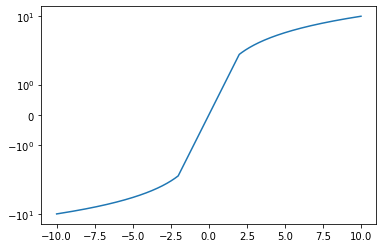

In [87]:
import math

l = np.linspace(10, -10, 1000)

#math.log(0.01, np.e)
f = l
plt.plot(l,f)

plt.yscale('symlog')

array([[ 4.,  3.,  7.,  2.,  4.,  1.,  4.,  5.,  4.,  5.],
       [14., 22., 11., 14., 19., 17., 21., 14., 24., 20.],
       [18., 14., 22., 21., 16., 10., 14., 12., 17., 20.],
       [10.,  3., 14., 14., 11.,  4., 18.,  8.,  6.,  5.],
       [ 3.,  4.,  3.,  8.,  3.,  6.,  4.,  3.,  6.,  8.],
       [ 1.,  3.,  5.,  5.,  4.,  5.,  4.,  4.,  3.,  3.],
       [ 8.,  6.,  7.,  8.,  9., 10.,  7.,  9.,  8.,  6.],
       [17.,  8.,  6., 17., 14., 10.,  8.,  6.,  7., 10.],
       [19., 18., 13., 17., 19., 12., 18., 18., 29., 16.],
       [ 3., 14., 11., 10.,  7.,  9.,  9.,  5.,  6.,  9.]])

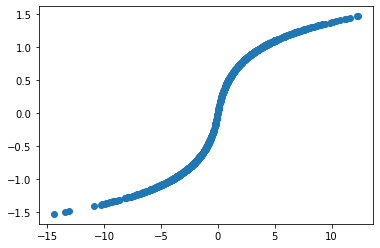

In [175]:
a = np.random.normal(0,3,1000)
f1 = np.random.uniform(1,10,1000)

b = [99+el for el in a]

sgn = lambda x: x and (1, -1)[int(x<0)]
C = 1/math.log(10 ,np.e)
fu = lambda x: sgn(x)*math.log(1+abs(x/C) , 10)

def diff(l):
    r = []
    for idx,e in enumerate(l):
        if idx == 0:
            d = 0
            r.append(d)
        else:
            d = e - l[idx-1]
            r.append(d)
    return np.array(r)

c = diff(b)
r = [fu(i) for i in c]

plt.plot(c, r, 'o')

H, xedges, yedges = np.histogram2d(r, f1)
H

In [179]:
from scipy.stats import chi2_contingency

f1 = np.random.normal(1,30,100)
p = [i*2 for i in f1]
f2 = np.random.standard_gamma(2, 100)

H, xedges, yedges = np.histogram2d(p, f2)

chi2_contingency(H, lambda_="log-likelihood")

ValueError: The internally computed table of expected frequencies has a zero element at (0, 6).

In [236]:
bins, ints = np.histogram(p)
ints_keys = list(range(ints.shape[0]))
ints_name = [f'{ints[idx]:.2f} : {ints[idx+1]:.2f}' if idx+1 <= ints.shape[0]-1 else 0 for idx in ints_keys]

ints_dict = {k:v for (k,v) in list(zip(ints_keys[:-1], ints_name[:-1]))}
ints_dict

x = 20

def intervals(l):
    bins, ints = np.histogram(l, bins=3)
    intervals = list(zip(ints[:-1], ints[1:]))
    return intervals

def define_interval(val, intervals):
    for idx, i in enumerate(intervals):
        if i[0] <= val <= i[1]:
            return intervals[idx]
        else:
            pass

df = pd.DataFrame(columns=['f1', 'f2', 'p', 'interval_f1', 'interval_f2', 'interval_p'])
df['f1'] = f1
df['f2'] = f2
df['p'] = p
df['interval_f1'] = [f'{define_interval(val, intervals(f1))}' for val in f1]
df['interval_f2'] = [f'{define_interval(val, intervals(f2))}' for val in f2]
df['interval_p'] = [f'{define_interval(val, intervals(p))}' for val in p]

data_crosstab1 = pd.crosstab(df['interval_f1'], df['interval_p'], margins = False)
data_crosstab2 = pd.crosstab(df['interval_f2'], df['interval_p'], margins = False)

print(chi2_contingency(data_crosstab2.to_numpy(), lambda_="log-likelihood"),
      chi2_contingency(data_crosstab1.to_numpy(), lambda_="log-likelihood"))

(1.465824450105242, 0.832677501587277, 4, array([[ 7.83, 57.42, 21.75],
       [ 1.08,  7.92,  3.  ],
       [ 0.09,  0.66,  0.25]])) (167.5057776146681, 3.5870469211697774e-35, 4, array([[ 5.94, 43.56, 16.5 ],
       [ 0.81,  5.94,  2.25],
       [ 2.25, 16.5 ,  6.25]]))


In [252]:
df = pd.DataFrame()
f1 = np.around(np.random.uniform(1,10, 5))
p = np.around(np.random.uniform(0,1, 5), 3)
df['f1'] = f1
df['p'] = p
df

,f1,p
0,2.0,0.228
1,4.0,0.262
2,9.0,0.377
3,4.0,0.644
4,9.0,0.360


In [257]:
df['interval_f1'] = [f'{define_interval(val, intervals(f1))}' for val in f1]
df['interval_p'] = [f'{define_interval(val, intervals(p))}' for val in p]

data_crosstab = pd.crosstab(df['interval_f1'], df['interval_p'])
data_crosstab

interval_p,"(0.228, 0.3666666666666667)","(0.3666666666666667, 0.5053333333333334)","(0.5053333333333334, 0.644)"
interval_f1,,,
"(2.0, 4.333333333333334)",2,0,1
"(6.666666666666667, 9.0)",1,1,0


In [49]:
b40 = """771501_3S
771502
774002_3S
774103_3S
160902_3S
160904
720501
657503
648402_3S
900303
900302
665401
440402_3S
636601_3S
616202_3S
650802_3S
650805
771803
775203
775302
772001
735702

776426_3S
776901_3S
775601_3S


775401
775403
770803_3S

775901_3S
775902
776002
776007
774601
774207
774701

776701
373101_3S
775101_3S
849502
372902
751801_3S
773701
780301_3S
771601_3S
280201
771205_3S
280301_3S"""

b40 = b40.strip().split('\n')

In [50]:
bank_names = pd.read_excel('bank_names.xlsx', header=None)
bank_names[1] = bank_names[1].astype(str)
df1 = pd.DataFrame(columns=['bank', 'info_system', 'bkk_version', 'persent'])

df1['info_system'] = [i for i in set(b40) if i != '']
df1['bank'] = [bank_names[bank_names[1] == i_s].reset_index()[0][0] for i_s in df1['info_system']]

In [51]:
import re
df = pd.read_csv('plmt100611112020.csv', sep=';')

all_regs = df.shape[0]
bkk_ver = []
persent = []

for bank in df1['info_system']:
    tmpdf = df.loc[df['info_system'] == bank].copy()
    persent.append(tmpdf.shape[0]/all_regs)
    tmpdf_k31 = tmpdf[(tmpdf['k3_1'] != "(Пустой)")&(tmpdf['k3_1'].notna())]
    if tmpdf_k31.shape[0] > 0:
        for idx, s in enumerate(tmpdf_k31['k3_1'].tolist()):
            if re.search('1.2.5',s):
                bkk_ver.append('1.2.5')
                break
            elif not re.search('1.2.5',s) and re.search('1.0.8',s):
                bkk_ver.append('1.0.8.0')
                break
            elif idx < tmpdf_k31['k3_1'].shape[0]-1:
                pass
            else:
                bkk_ver.append('Нет метрики')
    else:
        bkk_ver.append('нет регистраций')

df1['bkk_version'] = bkk_ver
df1['persent'] = persent
df1 = df1.sort_values(by=['persent'], ascending=False).to_excel('bkk_stuff.xlsx')

In [102]:
f'{(1000/all_regs)*100 :.2f} %'

'6.45 %'

In [54]:
df1

In [52]:
import re
df = pd.read_csv('plmtk100628102020.csv', sep=';')
print(len(df['info_system'].unique()))

banksdf = df.loc[:,['info_system', 'k3_1']].copy()
mask = [True if i_s in set(b40) else False for i_s in banksdf['info_system']]
banksdf = banksdf[mask]
banksdf = banksdf[(banksdf['k3_1'] != "(Пустой)")&(banksdf['k3_1']!= "[]")&(banksdf['k3_1'].notna())]
print(len(banksdf['info_system'].unique()))
#banksdf['lib'] = [s.replace('\\', '')[s.index('library')+10:s.index('library')+15] for s in banksdf['k3_1']]

libs = []
errors = []
for s in banksdf['k3_1']:
    try:
        s = s.replace('\\', '')
    except AttributeError:
        print(s)
        pass
    
    try:
        subs = s[s.index('1.2.5'):s.index('1.2.5')+5]
        libs.append(subs)
    except ValueError:
        libs.append('unnknown')
        errors.append(s)

banksdf['lib'] = libs
len(banksdf[banksdf['lib']=='1.2.5']['info_system'].unique())

129
23


11

In [84]:
len(df.iloc[16611]['k3_1'])

4096

In [9]:
import json
tdf = pd.read_csv('alfa_config.csv', sep=";")
a = tdf.iloc[0]['k3_1']
a

'["{ \\"code_text\\": \\"unk\\", \\"code\\": 68157440, \\"version\\": { \\"configuration\\": \\"\\"v8\\"\\", \\"configuration_hash\\": \\"16F9856B21BD69541C4BDCE91A541138\\", \\"library_version\\": \\"1.2.5\\", \\"vendor\\": \\"rtlabs\\" }, \\"metadata\\": { \\"length\\": { \\"value\\": 557.0, \\"enable\\": true, \\"state\\": \\"passed\\" }, \\"width\\": { \\"value\\": 494.0, \\"enable\\": false, \\"state\\": \\"passed\\" }, \\"height\\": { \\"value\\": 556.0, \\"enable\\": false, \\"state\\": \\"passed\\" }, \\"channels\\": { \\"value\\": 3.0, \\"enable\\": true, \\"state\\": \\"passed\\" }, \\"depth\\": { \\"value\\": 8.0, \\"enable\\": true, \\"state\\": \\"passed\\" }, \\"head_rx\\": { \\"value\\": 14.638398249921506, \\"enable\\": true, \\"state\\": \\"failed\\" }, \\"head_ry\\": { \\"value\\": -3.1130234925470379, \\"enable\\": true, \\"state\\": \\"passed\\" }, \\"head_rz\\": { \\"value\\": 4.8135467892625137, \\"enable\\": true, \\"state\\": \\"passed\\" }, \\"head_horizontal_s

In [10]:
d = """
["{ \"code_text\": \"unk\", \"code\": 68157440, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 557.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 494.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 556.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 14.638398249921506, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -3.1130234925470379, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 4.8135467892625137, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57345037421716849, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.955747398541128, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50220485833974982, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.32053872492673585, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 141.02701200993533, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 68157440, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 577.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 515.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 560.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 12.286978415871324, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -7.0278458799696342, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 3.9313185749286466, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57193289451228757, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.94655479431152345, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.49853203042039596, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.32812083618981497, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 136.89873313674175, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 202375168, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 576.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 507.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 566.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 11.778002964205729, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.8779951426248171, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.3980168786718887, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57743013822115385, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.93879471094785238, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50244916731554146, \"enable\": false, \"state\":\"passed\" }, \"face_vertical_position\": { \"value\": 0.31353158917106927, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 136.88746679549925, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 612.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 525.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 598.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 15.486014480636333, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -10.796583327650351, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 3.1305913794225453, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.60610537574404766, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.88810975703108685, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50080721537272133, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.35723603290060291, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 138.68350240856657, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 202375168, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 615.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 533.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 591.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 13.252312103157676, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -9.5128492731464558, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.7307000252175775, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.59233027417037998, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.91734876293821399, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50176575573031945, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.34959978984697215, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 139.09291862622598, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 67108864, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 605.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 524.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 594.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 16.319563936755518, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -7.0897760589477858, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 3.006503704232927, \"enable\": true, \"state\": \"passed\" },\"head_horizontal_size\": { \"value\": 0.6020875304709864, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.87739716346817798, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50262785867880322, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.37486381883974429, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 139.01533391886872, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 68157440, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 589.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 514.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 586.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 12.098958675946506, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -6.4917080466353676, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 2.4628037842703985, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.56829014640837794, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.90018590204544857, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50011657091430184, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.36817873866891698, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 135.28331108383708, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 67108864, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 591.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 517.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 583.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 13.392920084958851, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -7.7142017712672839, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 3.0945032211691368, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.56491047547449225, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.89209995695084687, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50029148492868447, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.37078663251821214, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 134.88454324154699, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 551.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 486.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 570.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true,\"state\": \"passed\" }, \"head_rx\": { \"value\": 8.8122400577114579, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.2185241565608074, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 3.1853611722729966, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57708288122106477, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.88445473118832241, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50143272101633829, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.36449648706536542, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 127.8466411730823, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 67108864, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 502.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 467.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 537.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 15.126452832159352, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -6.5167906357017706, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 3.3323859033559868, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57979752011676933, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.84880838234331357, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.49963139364499864, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.39414036962129106, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 120.71198932872095, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 85983232, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 826.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 23.609033809580144, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -6.7242153699454184, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 6.1928108577059708, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.36116434733072916, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.61061415354410808, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.51123867299821646, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.32430386278364393, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 116.98105681538824, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 135266304, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 509.0, \"enable\": true, \"state\":\"passed\" }, \"width\": { \"value\": 468.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 527.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 6.0102680757218563, \"enable\": true, \"state\": \"passed\" }, \"head_ry\": { \"value\": -8.3874466875662712, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 5.316647851355075, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.58927480583516956, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.94347526651632174, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.49735361898047292, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.32792875481737632, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 124.00541229884779, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 750.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 597.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 681.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 11.374532590875674, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.1777496347631242, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.0699996051029652, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.56844566255757956, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.82158539221675397, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50327185210670455, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.42626765190942345, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 147.45993644430527, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 744.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 598.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 669.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 11.658128021630128, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.581363442065749, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.2177280591138788, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57037812810279054, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.82523876241504346, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50105765033326422, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.43347317648575445, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 145.16241275003605, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\":\"passed\" } } }\",\"{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 710.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 590.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 637.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 11.056103195354156, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.2061350471800516, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.432376785621873, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.55789360434322033, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.85445251464843763, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.49896441152540305, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.39087920585644303, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 140.06876549206066, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 680.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 573.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 629.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 14.171496763543189, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -11.276705498940874, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.067399437463306, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.56927053508126091, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.83764266118715214, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50042284221549305, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.40426703970079769, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 139.94156035981479, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 67108864, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 515.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 503.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 549.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 18.049570598797001, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -5.4159588018870606, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": -1.5444708698187268, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57144007294125865, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.79674876895758628, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.49939635449327957, \"enable\": false,\"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.42983679085264226, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 122.11540130257612, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 83886080, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 496.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 481.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 541.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 12.716028701416723, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -6.9572353843300423, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": -1.9512744821854533, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57952436736616419, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.82120213535047948, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50175240530541432, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.41500246855335621, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 118.18789835485819, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 85983232, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 897.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 10.147655592343902, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -4.7295119836960851, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 2.8197462686440917, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.34948098924424914, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.66603580474853519, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.4935518980026245, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.3997824986775716, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 118.72559210387973, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 67108864, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 896.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 644.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 9.628606465426186, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -3.3852402550310727, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 2.8959438590247539, \"enable\": true, \"state\": \"passed\" },\"head_horizontal_size\": { \"value\": 0.55166313218774266, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.85477301279703777, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50087826888753761, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.4589652273390028, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 160.15446469405771, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 0, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 996.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": -0.049115403403779068, \"enable\": true, \"state\": \"passed\" }, \"head_ry\": { \"value\": -5.5565309251950925, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 2.4416942308668279, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.43964318169487848, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.84058123270670582, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.46431196928024293, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.41201233598921033, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 148.80659571407614, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 220200960, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 782.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 23.807601069130754, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -10.732340275864505, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 3.0121255902500823, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.34487787882486981, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.60216829935709637, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50277504656049943, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.2789609432220459, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 113.09261274623823, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 1048576, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 517.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 470.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 535.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\":\"passed\" }, \"head_rx\": { \"value\": 7.4031583715594884, \"enable\": true, \"state\": \"passed\" }, \"head_ry\": { \"value\": -7.2228772359642939, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 4.9284058116663871, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57693429500498672, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.93163709979191012, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50116555640038019, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.33483786360125678, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 125.89778907590164, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 201326592, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 504.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 470.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 551.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 16.132510668598258, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.9967516417238294, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.618185038359488, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57711850430103062, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.83929874260931836, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50076142371969024, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.40295621141547949, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 124.84171383575593, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 85983232, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 773.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 20.82563097750969, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -7.2899787219177918, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 1.0010609127308066, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.3271308898925781, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.58136363983154304, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50003926489088268, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.26214428080452812, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 109.40667343330881, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 0, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 639.0, \"enable\": true, \"state\": \"passed\" },\"width\": { \"value\": 554.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 610.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 7.517292540137694, \"enable\": true, \"state\": \"passed\" }, \"head_ry\": { \"value\": -6.7511758341467507, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": -1.4536087565683415, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.53907841981963556, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.84812107273789705, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.50088558472450895, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.39319892164136544, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 133.27761678620482, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 220200960, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 811.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 22.016238817775047, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -10.189511845351387, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 4.1276523626206636, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.34177521599663629, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.62749340057373049, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.51423553095923524, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.24382992320590549, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 117.87563909229007, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 85983232, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 813.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 720.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 22.412128534900035, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -7.3387676169328389, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 1.9314451623644371, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.3594481150309245, \"enable\": true, \"state\": \"failed\" }, \"head_vertical_size\": { \"value\": 0.6335382207234701, \"enable\": true, \"state\": \"passed\" }, \"face_horizontal_position\": { \"value\": 0.53321483400132919, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.2574807087580363, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 119.02104684823608, \"enable\": true, \"state\": \"failed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\":\"unk\", \"code\": 202375168, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 572.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 511.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 555.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 15.308818882998692, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.2889066946368501, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 2.8360396849091569, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.58700149446550876, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.93334744015255489, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50132401535422366, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.33701609018686657, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 138.34330416238154, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 202375168, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 553.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 499.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 550.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 16.031089189612739, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.9224093014764723, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 3.1143867556166902, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.5756528926994614, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.94438255171342333, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50265911729158996, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.32362045114690607, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 135.58385347839098, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 202375168, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 504.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 468.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 527.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 11.811381244905935, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -8.1446454154033656, \"enable\": true, \"state\": \"failed\" }, \"head_rz\": { \"value\": 1.1374841230048796, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57219030918219149, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.95994244164714781, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50055595748444903, \"enable\": false, \"state\": \"passed\" },\"face_vertical_position\": { \"value\": 0.31122785094114591, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 129.43345543295729, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }","{ \"code_text\": \"unk\", \"code\": 68157440, \"version\": { \"configuration\": \"\"v8\"\", \"configuration_hash\": \"16F9856B21BD69541C4BDCE91A541138\", \"library_version\": \"1.2.5\", \"vendor\": \"rtlabs\" }, \"metadata\": { \"length\": { \"value\": 504.0, \"enable\": true, \"state\": \"passed\" }, \"width\": { \"value\": 465.0, \"enable\": false, \"state\": \"passed\" }, \"height\": { \"value\": 529.0, \"enable\": false, \"state\": \"passed\" }, \"channels\": { \"value\": 3.0, \"enable\": true, \"state\": \"passed\" }, \"depth\": { \"value\": 8.0, \"enable\": true, \"state\": \"passed\" }, \"head_rx\": { \"value\": 9.95437063034265, \"enable\": true, \"state\": \"failed\" }, \"head_ry\": { \"value\": -6.3207428621812483, \"enable\": true, \"state\": \"passed\" }, \"head_rz\": { \"value\": 1.3496195533417206, \"enable\": true, \"state\": \"passed\" }, \"head_horizontal_size\": { \"value\": 0.57688480500252015, \"enable\": true, \"state\": \"passed\" }, \"head_vertical_size\": { \"value\": 0.9641916199307361, \"enable\": true, \"state\": \"failed\" }, \"face_horizontal_position\": { \"value\": 0.50000920039351271, \"enable\": false, \"state\": \"passed\" }, \"face_vertical_position\": { \"value\": 0.30687441041654362, \"enable\": false, \"state\": \"passed\" }, \"eyes_distance\": { \"value\": 129.94932091226914, \"enable\": true, \"state\": \"passed\" }, \"method\": { \"value\": 0.0, \"enable\": true, \"state\": \"passed\" } } }"]
"""
d = d.replace('\"{','{')
d = d.replace('}\"','}')
d = d.replace('\n','')
d = d.replace('""','"')
c = json.loads(d)

In [11]:
len(d)

41187

In [114]:
c[0]['metadata']['head_rx']['state']

for idx, photo_try in enumerate([c[20], c[25]]):
    print("--------------------")
    print(f"Номер в списке: {idx}")
    print(f"Код ошибки: {photo_try['code']}")
    print(f"Значение rx: {photo_try['metadata']['head_rx']['value']}\nСтатус: {photo_try['metadata']['head_rx']['state']}")
    print(f"Значение ry: {photo_try['metadata']['head_ry']['value']}\nСтатус: {photo_try['metadata']['head_ry']['state']}")
    print(f"Значение rz: {photo_try['metadata']['head_rz']['value']}\nСтатус: {photo_try['metadata']['head_rz']['state']}")
    print("--------------------\n")


--------------------
Номер в списке: 0
Код ошибки: 0
Значение rx: -0.04911540340377907
Статус: passed
Значение ry: -5.5565309251950925
Статус: passed
Значение rz: 2.441694230866828
Статус: passed
--------------------

--------------------
Номер в списке: 1
Код ошибки: 0
Значение rx: 7.517292540137694
Статус: passed
Значение ry: -6.751175834146751
Статус: passed
Значение rz: -1.4536087565683415
Статус: passed
--------------------



In [115]:
for idx, photo_try in enumerate([c[20], c[25]]):
    print(photo_try)

{'code_text': 'unk', 'code': 0, 'version': {'configuration': 'v8', 'configuration_hash': '16F9856B21BD69541C4BDCE91A541138', 'library_version': '1.2.5', 'vendor': 'rtlabs'}, 'metadata': {'length': {'value': 996.0, 'enable': True, 'state': 'passed'}, 'width': {'value': 720.0, 'enable': False, 'state': 'passed'}, 'height': {'value': 720.0, 'enable': False, 'state': 'passed'}, 'channels': {'value': 3.0, 'enable': True, 'state': 'passed'}, 'depth': {'value': 8.0, 'enable': True, 'state': 'passed'}, 'head_rx': {'value': -0.04911540340377907, 'enable': True, 'state': 'passed'}, 'head_ry': {'value': -5.5565309251950925, 'enable': True, 'state': 'passed'}, 'head_rz': {'value': 2.441694230866828, 'enable': True, 'state': 'passed'}, 'head_horizontal_size': {'value': 0.4396431816948785, 'enable': True, 'state': 'passed'}, 'head_vertical_size': {'value': 0.8405812327067058, 'enable': True, 'state': 'passed'}, 'face_horizontal_position': {'value': 0.46431196928024293, 'enable': False, 'state': 'pas

In [133]:
v = json.loads(tdf.iloc[0]['k1_2'])
print("Значение на серверной БКК")
print(v['metadata']['head_rx'])
print(v['metadata']['head_ry'])
print(v['metadata']['head_rz'])

Значение на серверной БКК
{'value': 9.084505912180154, 'status': 'failure', 'enable': 'true'}
{'value': -7.796975126271376, 'status': 'passed', 'enable': 'true'}
{'value': -1.5033545183974253, 'status': 'passed', 'enable': 'true'}


In [134]:
print("Значение на фронтовой БКК")
print(c[25]['metadata']['head_rx'])
print(c[25]['metadata']['head_ry'])
print(c[25]['metadata']['head_rz'])

Значение на фронтовой БКК
{'value': 7.517292540137694, 'enable': True, 'state': 'passed'}
{'value': -6.751175834146751, 'enable': True, 'state': 'passed'}
{'value': -1.4536087565683415, 'enable': True, 'state': 'passed'}


In [138]:
v

{'errors': ['HEAD_POS_X'],
 'metadata': {'head_rz': {'value': -1.5033545183974253,
   'status': 'passed',
   'enable': 'true'},
  'head_ry': {'value': -7.796975126271376,
   'status': 'passed',
   'enable': 'true'},
  'head_rx': {'value': 9.084505912180154,
   'status': 'failure',
   'enable': 'true'},
  'head_vertical_size': {'value': 0.8557774628185835,
   'status': 'passed',
   'enable': 'true'},
  'method': {'value': 0.0, 'status': 'passed', 'enable': 'true'},
  'eyes_distance': {'value': 133.1848062620184,
   'status': 'passed',
   'enable': 'true'},
  'head_horizontal_size': {'value': 0.5392640041530348,
   'status': 'passed',
   'enable': 'true'},
  'length': {'value': 639.0, 'status': 'passed', 'enable': 'true'},
  'depth': {'value': 8.0, 'status': 'passed', 'enable': 'true'},
  'channels': {'value': 3.0, 'status': 'passed', 'enable': 'true'},
  'width': {'value': 554.0, 'status': 'passed', 'enable': 'true'},
  'face_vertical_position': {'value': 0.3931079020265673,
   'status'

In [7]:
t = pd.read_csv('test_k3_1.csv', sep=';')

len(t.iloc[0]['k3_1'])

4096